In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import itertools
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
def plot_wigner(dm, x):
    xvec = np.linspace(-x,x,200)
    yvec = np.linspace(-x,x,200)
    # Figure settings
    fig, axes = plt.subplots(1,1)
    fig.set_size_inches(10,8)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel(r'Re ($\alpha$)', fontsize=20)
    plt.ylabel(r'Im ($\alpha$)', fontsize=20)
    plt.title("Time Evolution", fontsize=20)
    plt.grid()
    # Color bar settings
    wigner0 = wigner(dm, xvec, yvec, g =2)
    cont0 = axes.contourf(xvec, yvec, wigner0, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -2/np.pi, vmax = 2/np.pi))
    fig.colorbar(cont0)
    

def fidelity(A, B):
    return (((A.sqrtm() * B * A.sqrtm()).sqrtm()).tr())**2


def plot_expectation_values(results, ylabels=[], title=None, show_legend=False,
                            fig=None, axes=None, figsize=(8, 4)):

    if not isinstance(results, list):
        results = [results]

    n_e_ops = max([len(result.expect) for result in results])

    if not fig or not axes:
        if not figsize:
            figsize = (12, 3 * n_e_ops)
        fig, axes = plt.subplots(n_e_ops, 1, sharex=True,
                                 figsize=figsize, squeeze=False)

    for r_idx, result in enumerate(results):
        for e_idx, e in enumerate(result.expect):
            axes[e_idx, 0].plot(result.times, e,
                                label="%s [%d]" % (result.solver, e_idx))

    if title:
        axes[0, 0].set_title(title)

    axes[n_e_ops - 1, 0].set_xlabel("time", fontsize=12)
    for n in range(n_e_ops):
        if show_legend:
            axes[n, 0].legend()
        if ylabels:
            axes[n, 0].set_ylabel(ylabels[n], fontsize=12)

    return fig, axes

def simulate_wigner(dm_list, x, name): 
    xvec = np.linspace(-x,x,200)
    yvec = np.linspace(-x,x,200)
    
    wigner_list = [wigner(state, xvec, yvec, g = 2.0) for state in dm_list] 
    
    # Figure settings
    fig, axes = plt.subplots(1,1)
    fig.set_size_inches(10,8)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel(r'Re ($\alpha$)', fontsize=20)
    plt.ylabel(r'Im ($\alpha$)', fontsize=20)
    plt.title("Time Evolution", fontsize=20)
    
    wigner0 = wigner(dm_list[0], xvec, yvec)
    cont0 = axes.contourf(xvec, yvec, wigner0, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -2/np.pi, vmax = 2/np.pi))
    fig.colorbar(cont0)
    
    def wigner_frame(frame): # gets a frame number and ouputs a wigner plot
        wi = wigner_list[frame]
        cont = axes.contourf(xvec, yvec, wi, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -2/np.pi, vmax = 2/np.pi))


    anim = FuncAnimation(fig, wigner_frame, frames = len(wigner_list), interval = 150) # gif maker
    anim.save(name, writer='imagemagick', fps = 60)

def displ(dim, alpha):
    a = destroy(dim)
    a_dag = a.dag()
    return (alpha * a_dag - alpha.conjugate() * a).expm()

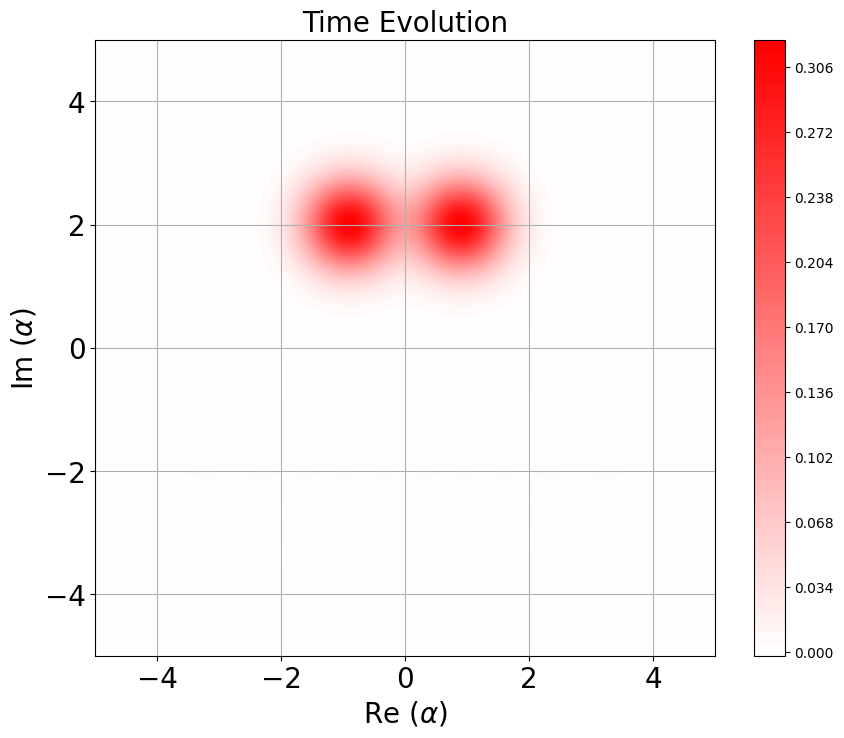

In [3]:
dim = 20
ground = Qobj([[1],[0]])
excited = Qobj([[0],[1]])
qstate = 1/np.sqrt(2) * (ground + excited) 
cstate1 = coherent(dim, 0) 
I = qeye(2)
init = tensor(cstate1, qstate)
a1 = 1/np.sqrt(2) * (tensor(displace(dim , 2 * 1j + 0.9) * cstate1, ground) + tensor(displace(dim , 2 * 1j - 0.9) * cstate1, excited))
plot_wigner(a1.ptrace(0), 5)

In [208]:
d = tensor(displace(dim, -1j), I)

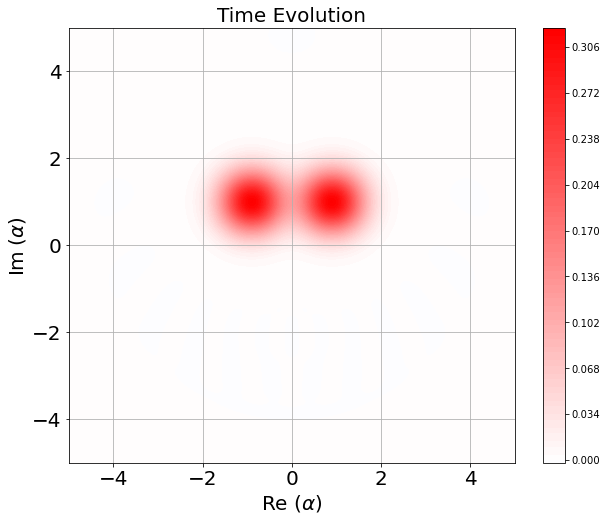

In [209]:
new = d * a1
plot_wigner(new.ptrace(0), 5)

In [143]:
new

Quantum object: dims = [[20, 2], [1, 1]], shape = (40, 1), type = ket
Qobj data =
[[-3.96251723e-02+8.65825810e-02j]
 [-6.54999692e-03+1.43120044e-02j]
 [-1.69202645e-01-8.79086027e-02j]
 [-1.61790146e-02-4.02928022e-02j]
 [ 1.36285972e-01-2.33072598e-01j]
 [ 7.87191801e-02+3.12529141e-02j]
 [ 2.61260580e-01+1.70825938e-01j]
 [-1.22439982e-01+5.66137110e-02j]
 [-1.83888968e-01+2.52719284e-01j]
 [ 5.97042751e-02-1.76223006e-01j]
 [-2.17815244e-01-1.75777236e-01j]
 [ 1.06887598e-01+2.03138851e-01j]
 [ 1.52413731e-01-1.70669281e-01j]
 [-2.48771758e-01-7.02956566e-02j]
 [ 1.23252902e-01+1.21664873e-01j]
 [ 2.31790167e-01-1.37571854e-01j]
 [-9.03887583e-02+8.28524521e-02j]
 [-5.84247768e-02+2.56316025e-01j]
 [-5.22257779e-02-6.30172571e-02j]
 [-1.33864545e-01-2.01277716e-01j]
 [ 4.14957918e-02-3.10262217e-02j]
 [ 2.07763663e-01+3.62868001e-02j]
 [ 1.74301373e-02+2.59885151e-02j]
 [-1.40814983e-01+1.04534013e-01j]
 [-1.55639424e-02+9.37793467e-03j]
 [ 1.70547317e-02-1.38571017e-01j]
 [-4.855

In [249]:
c = 1/np.sqrt(2) * (tensor(displace(dim , 2 * 1j + 0.9 - 1j) * cstate1, ground)+(-0.2272020946930871+0.9738476308781951j)*
                    tensor(displace(dim , 2 * 1j - 0.9 - 1j) * cstate1, excited))
#(new.dag() * c) * (c.dag()* new)
fidelity(new * new.dag(), c* c.dag())

(1.0000000264717739+2.18273795620709e-06j)

In [269]:
alpha = 2 * 1j + 0.9
beta = -1j

phase = np.exp((alpha * beta.conjugate() - alpha.conjugate() * beta))
phase*phase.conjugate()

(1+0j)

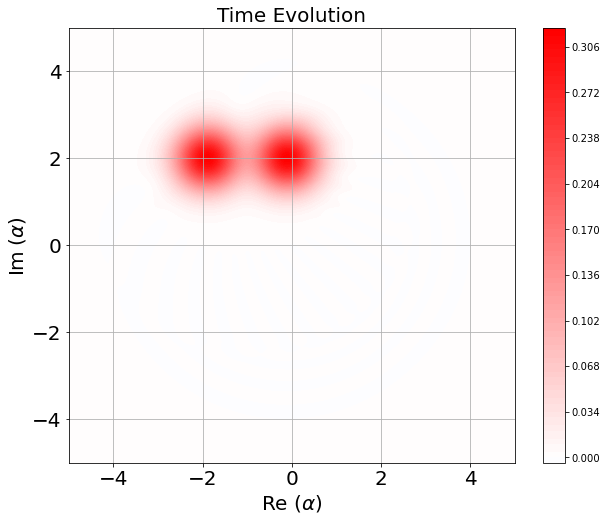

In [194]:
plot_wigner(c.ptrace(0), 5)

In [142]:
c

Quantum object: dims = [[20, 2], [1, 1]], shape = (40, 1), type = ket
Qobj data =
[[ 9.52192082e-02+0.00000000e+00j]
 [ 1.57396293e-02+0.00000000e+00j]
 [-9.52192082e-03+1.90438416e-01j]
 [-2.99052956e-02+3.14792585e-02j]
 [-2.68647290e-01-2.69320591e-02j]
 [-4.34054345e-03-8.45849492e-02j]
 [ 4.66088217e-02-3.08652247e-01j]
 [ 1.02431713e-01+8.77747443e-02j]
 [ 3.06321806e-01+6.20414341e-02j]
 [-1.85084871e-01+1.90457058e-02j]
 [-6.91906732e-02+2.71207975e-01j]
 [ 1.40232700e-01-1.81728192e-01j]
 [-2.18615687e-01-6.75659673e-02j]
 [ 3.96059002e-02+2.55460923e-01j]
 [ 5.93379668e-02-1.62704172e-01j]
 [-2.21552665e-01-1.53515597e-01j]
 [ 1.12951310e-01+4.77107399e-02j]
 [ 2.57379904e-01-5.35369983e-02j]
 [-3.55722036e-02+7.37105153e-02j]
 [-1.27316572e-01+2.05494388e-01j]
 [-4.54937305e-02-2.48287677e-02j]
 [-5.34691243e-02-2.03986124e-01j]
 [ 1.63439999e-02-2.66851396e-02j]
 [ 1.53649092e-01+8.46202000e-02j]
 [ 1.49348489e-02+1.02065375e-02j]
 [-1.33099977e-01+4.22872848e-02j]
 [-6.075

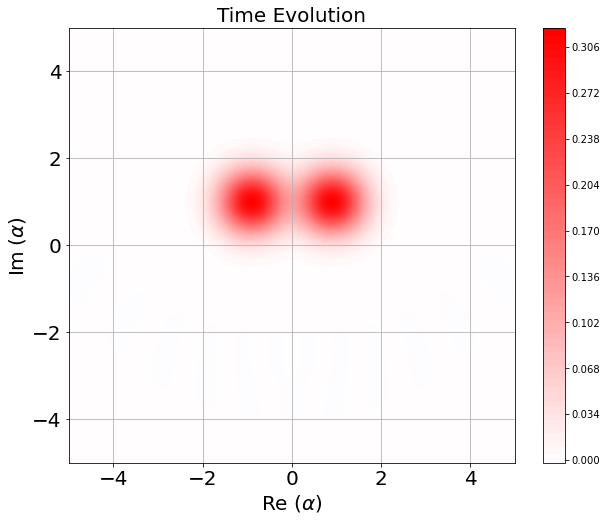

In [118]:
plot_wigner(c.ptrace(0), 5)

In [40]:
fidelity(a * a.dag(), a * a.dag())

(1.0000000799278095+1.0305853985194418e-07j)

In [204]:
d2 = displace(dim , 1)
a3 = coherent(dim , 1)
c3 = coherent(dim , 1 + 1)
new2 = d2 * a3

In [203]:
(new2.dag() * c3)*(c3.dag() * new2)

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

In [268]:
f = 7.31e9
Q = 2.42e7
1/(2*np.pi) * Q/f * 1e6


526.8877733001186

In [172]:
f = 5.e9 
c = 1.69e8
#c = lamb f 
f = 6.3e9
lamb = c/f

In [173]:
lamb/4 * 10**3

6.7063492063492065

In [ ]:
l = 12.3e-3
lambd = 2 * l 
f = 6.3

In [ ]:
#test 1 mode ecd gate if phase also appears

In [5]:
def ECD(cstate1, qstate, t, chiA, alphaA, KA, TcA, Tq, Tq2, deltaA, dim):
    I = qeye(2)
    Ir = qeye(dim)
    a = destroy(dim)
    a_dag = a.dag()
    q = destroy(2)
    q_dag = q.dag()
    
    #dephasing, loss parameters
    kappaA = 1/TcA 
    gamma = 1/Tq 
    gammaphi =  1/Tq2 - gamma/2
    #kappaA = 0
    #kappaB = 0
    #gamma = 0
    #gammaphi = 0
    
    #psi0dm = cstate * cstate.dag()
    D = tensor(displace (dim, alphaA), I)
    init = tensor(cstate1, qstate)
    
    #displacement
    psi1 = D * init
    psi1dm = psi1 * psi1.dag() 
    
    #dispersive coupling time evolution
    HKerr1 = -KA/2 * tensor(a_dag * a_dag * a * a, I)
    Hcav1 = deltaA * tensor(a_dag * a, I) #detuning delta 
    Hdisp1 = -chiA * tensor(a_dag * a, q_dag * q)
    
    
    Hint =   HKerr1 + Hcav1 + Hdisp1 
    
    tlist = np.linspace(0,t,500)
    c_opscav1 = np.sqrt(kappaA) * tensor(a, I)
    c_opsq1 = np.sqrt(gamma) * tensor(Ir, q)
    c_opsq2 = np.sqrt(gammaphi) * tensor(Ir, q_dag * q)
    result = mesolve(Hint,psi1dm , tlist, [c_opscav1, c_opsq1 + c_opsq2], [])
    psi2 = result.states[-1]
    
    
    #displacement
    D2 = tensor(displace(dim, -alphaA * np.cos(chiA*t/2)), I)
    psi3 = D2 * psi2 * D2.dag()
    #pi-pulse 
    PI = tensor(Ir, sigmax())
    psi4 = PI * psi3 * PI.dag()
    
    #displacement
    psi5 = D2 * psi4 * D2.dag()
    
    #coupled time evolution 
    result2 = mesolve(Hint, psi5, tlist, [c_opscav1 + c_opsq1 + c_opsq2] , [])
    psi6 = result2.states[-1]
    
    #displacement 
    D3 = tensor(displace(dim, alphaA* np.cos(chiA * t)), I)
    psi7 = D3 * psi6 * D3.dag()
    
    #return (psi0dm, psi1dm, psi2dm, psi3dm, psi4dm, psi5dm, psi6dm, psi7dm)
    return [init, psi1, psi2, psi3, psi4, psi5, psi6, psi7]

In [29]:
##initialise qubit state in equal superposition of ground and excited state
dim = 18
ground = Qobj([[1],[0]])
excited = Qobj([[0],[1]])
qstate = rx(np.pi/2) * ground
cstate1 = coherent(dim, 0) 

#cstate1, cstate2, qstate, t, chiA, chiB, alphaA, alphaB, KA, KB, KAB, TcA, TcB, Tq, Tq2, deltaA, deltaB, dim
#realistic parameters 

chiA = 798.4 * 10**3 #cavity A dispersive shift

w0A = 4.38 * 10**9 #cavity A frequency
wdA = w0A - chiA/2 #drive frequency of cavity A
deltaA = w0A - wdA


#K = np.pi
KA = 1.4 * 10**3

t = 2*np.pi/chiA * 0.1 #wait time 

alphaA = 5*1j

TcA = 105 * 10**(-3) #seconds - cavity A relaxation time
T1 = 522 * 10**(-6) #seconds - transmon relaxation time
T2 = 600 * 10**(-6) #seconds - transmon coherence time

#play ECD
final = ECD(cstate1, qstate, t, chiA, alphaA,KA, TcA,T1, T2, deltaA, dim)
#final = ECD(cstate1, cstate2, qstate, t, chiA, chiA, alphaA, alphaA, 0,0, 0, 1,1,1,1,deltaA, deltaA, dim)



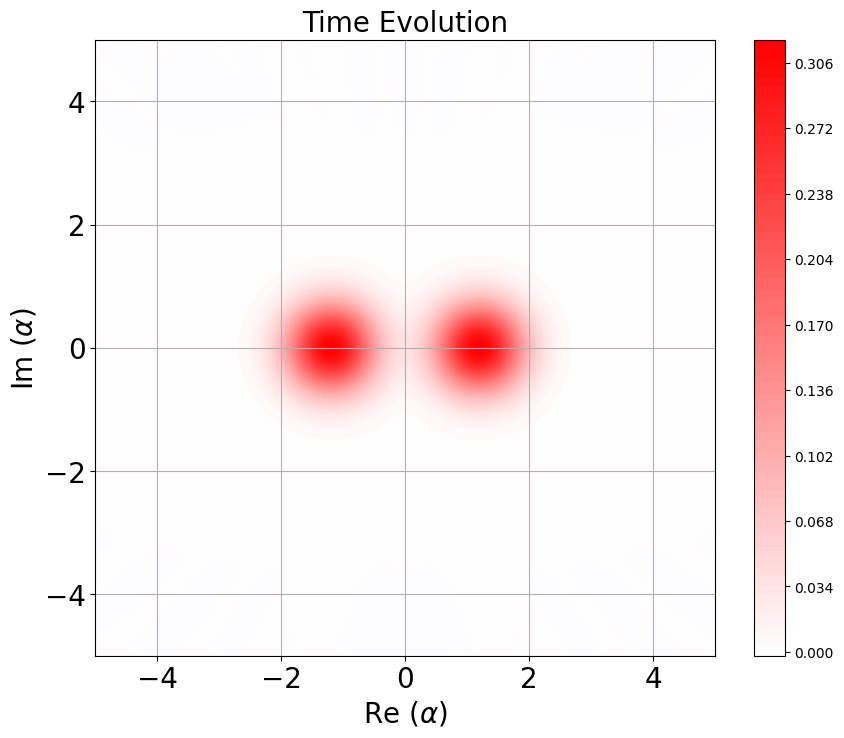

In [18]:
plot_wigner(final[7].ptrace(0), 5)

In [338]:
beta = 2 * 1j * alphaA * np.sin(chiA * t) #expected beta in ECD
vac = coherent(dim, 0) 
goal_state0 = 1/np.sqrt(2)*(tensor(displace(dim, beta/2) * vac, ground) 
                           + tensor(displace(dim, -beta/2) * vac, excited))
goal_dm0 = goal_state0 * goal_state0.dag()
fidelity(goal_dm0, final[7])

(0.18848033208254583-4.140285595617485e-06j)

In [30]:
def calculate_phase(alphaA, alphaB, chiA, chiB, t):
    a = alphaA * np.exp(-1j*chiA/2 * t)
    dis_a = -alphaA * np.cos(chiA*t/2)
    b = alphaB * np.exp(-1j*chiB/2 * t)
    dis_b = -alphaB * np.cos(chiB*t/2)
    first_phase_a = np.exp((a * dis_a.conjugate() - a.conjugate() * dis_a))
    first_phase_b = np.exp((b * dis_b.conjugate() - b.conjugate() * dis_b))
    first_phase = first_phase_a * first_phase_b 
    
    a = alphaA * np.exp(-1j*chiA/2 * t) - alphaA * np.cos(chiA*t/2)
    dis_a = -alphaA * np.cos(chiA*t/2)
    b = alphaB * np.exp(-1j*chiB/2 * t) - alphaB * np.cos(chiB*t/2)
    dis_b = -alphaB * np.cos(chiB*t/2)
    second_phase_a = np.exp((a * dis_a.conjugate() - a.conjugate() * dis_a))
    second_phase_b = np.exp((b * dis_b.conjugate() - b.conjugate() * dis_b))
    second_phase = second_phase_a * second_phase_b 
    
    a = (alphaA * np.exp(-1j*chiA/2 * t) - 2*alphaA*np.cos(chiA*t/2))*np.exp(1j*chiA/2*t)
    dis_a = alphaA* np.cos(chiA * t)
    b = (alphaB*np.exp(-1j*chiB/2 * t) - 2*alphaB*np.cos(chiB*t/2))*np.exp(1j*chiB/2*t)
    dis_b = alphaB* np.cos(chiB * t)
    third_phase_a = np.exp((a * dis_a.conjugate() - a.conjugate() * dis_a))
    third_phase_b = np.exp((b * dis_b.conjugate() - b.conjugate() * dis_b))
    third_phase = third_phase_a * third_phase_b 
    
    return first_phase * second_phase * third_phase

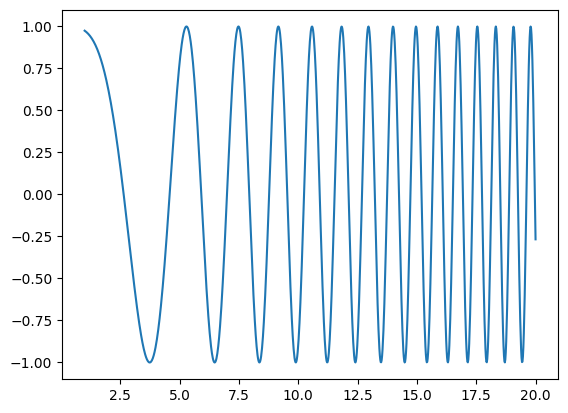

In [28]:
alphaA = np.linspace(1,20,1000)
plt.plot(alphaA, calculate_phase(alphaA, 0, chiA, 0, t).real)

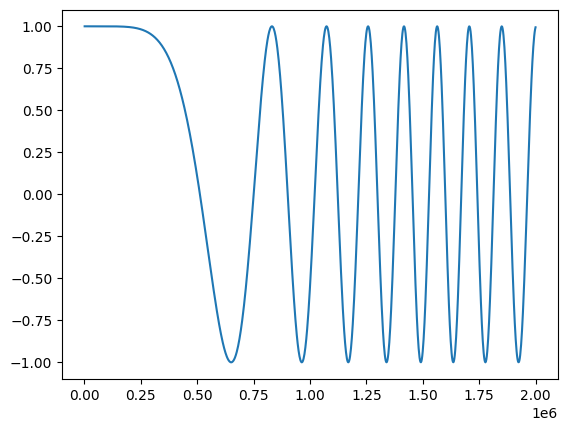

In [34]:
chiA = np.linspace(1 * 10**3, 2000 * 10**3, 1000)
plt.plot(chiA, calculate_phase(alphaA, 0, chiA, 0, t).real)

In [333]:
phase = calculate_phase(alphaA, 0, chiA, 0, t)

In [334]:
phase

(0.6231316168849181+0.7821169912732927j)

In [309]:
np.arctan(phase.real/phase.imag)/(2*np.pi) * 360

38.54518411738116

In [19]:
from qutip.qip.operations import rx, ry
Ir = qeye(dim)
Rx = tensor(Ir, rx(np.pi/2) * np.sqrt(2))
step = Rx * final[7] * Rx.dag()
selector2 = tensor(Ir, ground)
disentangled2 = selector2.dag() * step *selector2

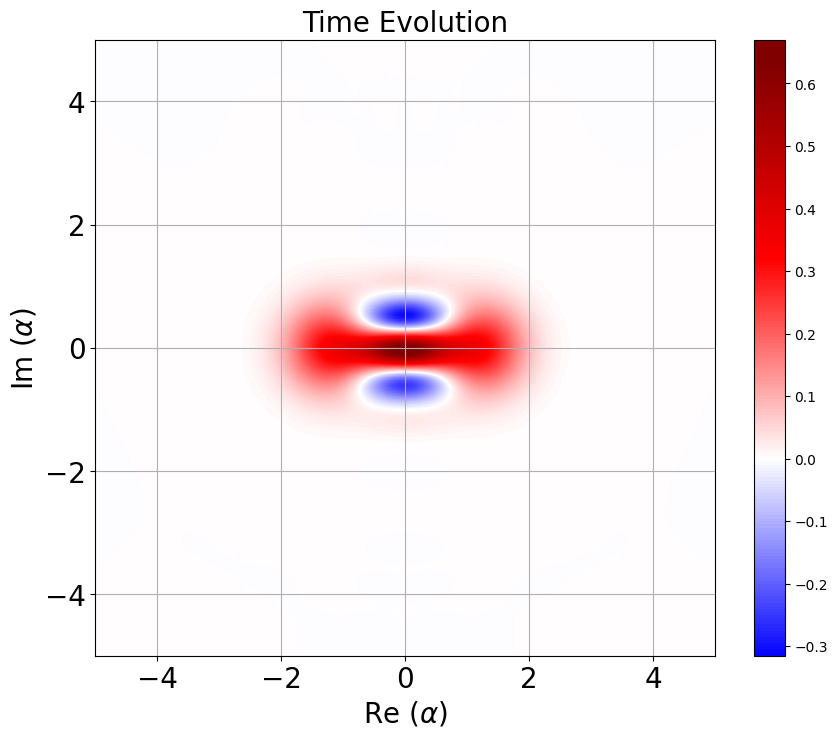

In [20]:
plot_wigner(disentangled2, 5)

In [320]:
step_p =  Ry * goal_dm0 * Ry.dag()
disentangled_p = selector2.dag() * step_p *selector2

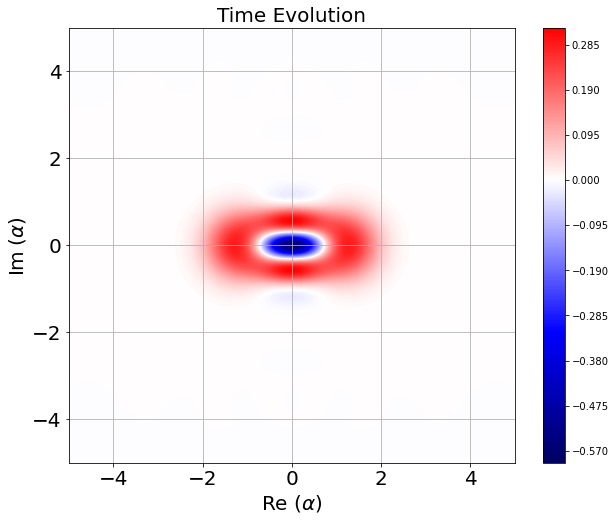

In [321]:
plot_wigner(disentangled_p, 5)

In [323]:
rx(np.pi/2) * ground

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        -0.70710678j]]